# Solutions Q51 - 54

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Q51 answer
**(a)** The rate equations are

$$\displaystyle \frac{dA}{dt}=-k_{12}A+k_{21}B , \qquad \frac{dB}{dt}=k_{12}A-(k_2+k_{21})B,\quad \frac{dC}{dt}=k_2B-k_3C$$

Species A forms B with a rate $k_{12}A$ so appears as $-k_{12}A$ in the first equation, but A is reformed from B at $+k_{21}B$, which is the second term. Species B is lost both to A and C, which produces its second term, but is formed only from A. C is formed from B, and lost in an unspecified species with rate constant $k_3$.
The matrix representation is

$$\displaystyle \begin{bmatrix}\displaystyle\frac{dA}{dt}\\\displaystyle\frac{dB}{dt}\\\displaystyle\frac{dC}{dt}\\ \end{bmatrix}=\begin{bmatrix}-k_{12} & k_{12} & 0\\k_{21} & -k_{21}-k_2 & 0\\0& k_2 & -k_3 \end{bmatrix}\begin{bmatrix}A\\B\\C \end{bmatrix} $$

which when multiplied out forms the three rate equations. The calculation produces the populations shown in figure 91, using the Algorithm outlined after figure 55. The initial population of A, falls rapidly, because $k_{12}$ is large and $[B]$ rises rapidly for the same reason, but also reforms A because $k_{21} = 6$. A temporary, or dynamic equilibrium is set up as may be seen after B reaches a maximum because A and B decay at approximately the same rate to form C. C decays slowly, so its population passes through a maximum.

![Drawing](matrices-fig91.png)

Figure 91. Scheme $A\rightleftharpoons B\to C\to$ with rate constants $k_{12} = 5, k_{21} = 6, k_2 =1,k_3 =0.2$.
__________

**(b)** Following the method in the text, a typical calculation is shown below. Can you explain why the concentration of C initially falls ?  Next, calculate the steady state values.

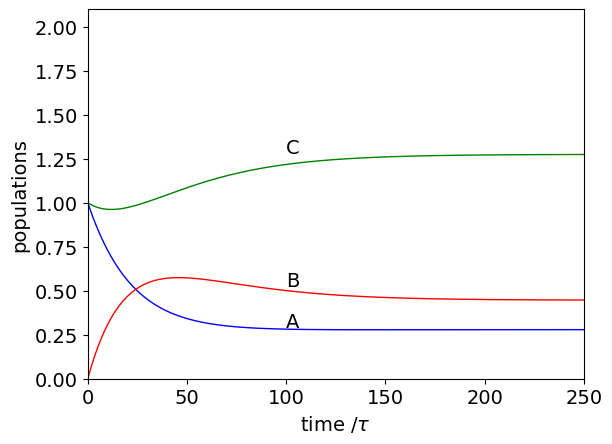

In [2]:
tau = 1e-9                 # set time to make rate constants into probabilities
k12 = 4e7 *tau             # choose some rate constants
k21 = 5e6 *tau
k23 = 2e7 *tau
k31 = 7e6 *tau             

TT = np.array([[ 1 - k12, k12, 0 ],[ k21, 1 - k21-k23, k23] ,[k31,0,1-k31]] )  #  transfer matrix 
T = np.transpose(TT)
p = np.array([1,0,1])             # initial values of A, B and C

n = 250                           # number of points
A = np.zeros(n,dtype=float)       # array to hold calculated values
B = np.zeros(n,dtype=float)
C = np.zeros(n,dtype=float)
A[0] = p[0]                       # initial values
B[0] = p[1]
C[0] = p[2]
t = np.linspace(0,n,n)            # time steps
for i in range(1,n,1):
    temp = T @ p                  # @ is matrix multiply
    A[i] = temp[0]                # save values
    B[i] = temp[1]
    C[i] = temp[2]
    p = temp                      # ready for next step
    pass

plt.plot(t, A, color='blue',linewidth=1)
plt.plot(t, B, color='red',linewidth=1)
plt.plot(t, C, color='green',linewidth=1)
plt.xlim([0,n])
plt.ylim([0,A[0]+B[0]+C[0]+0.1])
plt.ylabel('populations')
plt.xlabel('time /'+r'$\tau$')
plt.text(100, 1.05*A[100],'A')
plt.text(100, 1.05*B[100],'B')
plt.text(100, 1.05*C[100],'C')

plt.show()

## Q52 answer
The rate equation for the fourth molecule is, with $C_1 \cdots C_7$ being the populations of the BChl molecules, and $k_f$ the fluorescence rate constant,

$$\displaystyle \begin{align}\frac{dC_4}{dt}=-k_fC_4&-(k_{41}+k_{42}+k_{43}+k_{45}+k_{46}+k_{47})C_4 \\&+k_{14}C_1+ k_{24}C_2 +k_{34}C_3 + k_{54}C_5  + k_{64}C_6 + k_{74}C_7 \end{align}$$

and the pattern is clear if we concentrate on the subscripts. The term in brackets, is the total loss of population from $C_4$ by energy transfer, and is the sum of all rate constants to all other molecules. The terms are the sum of all rate constants starting with index 4, except the $k_{44}$, which would be the rate transferring to itself, which does not make sense. The individual terms in the second line $k_{14}C_1$ etc., are the terms describing energy transfer from other molecules onto molecule 4, so there must be six of them each of which are positive.

The matrix now looks like the one below but, for clarity, only some of the entries are filled. The dot over each of the $C$'s in the left column vector means that this is the derivative; $dC/dt$.

$$\displaystyle \begin{bmatrix}\dot C_1\\ \dot C_2\\ \vdots\\ \vdots\\ \dot C_7\\ \end{bmatrix} = 
\begin{bmatrix}-S_1-k_f & k_{21} &\cdots & & & \\ 
\vdots & & & & & & \vdots  \\ k_{14} & k_{24}& k_{34} & -S_4-k_f & k_{54} & k_{64} & k_{74}\\ \vdots & & & & & & \vdots \\k_{17} & & & & &\cdots &-S_7-k_f\\  \end{bmatrix}\begin{bmatrix}C_1\\C_2\\ \vdots\\ \vdots \\ C_7 \end{bmatrix} $$

and a  shorthand notation is used in the matrix; for example, 

$$\displaystyle S_n=\sum_i^nk_{ni}(1-\delta_{ni})$$

which is the sum of all rate constants except $k_{nn}$ which does not exist.  The rate constants for each energy transfer step still need to be calculated. The distance between two Mg atoms labelled i and j is found using Pythagoras, as 

$$\displaystyle R_{ij}=\sqrt{ (x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2 }$$

and the rate constant is $\displaystyle R_{ij}=k_f\left(\frac{R_0}{R} \right)^6$.

The calculation is shown below. The following points are important.

(1) The transfer rate with index $ii$ is set to zero because this has no physical meaning because it is the transfer rate from any molecule to itself, and 

(ii) an '$\mathtt{if\, else}$'  statement is used to remove this term by making it zero. Because the calculation is numerical the matrix equation has to be solved at each time point and the result is stored in the 2D array pop.  

Note that when the off-diagonal terms are calculated (shown below) $M[i,j] = kC[j,i]$ to obtain the correct rate constant. As it happens in this calculation $k_{i,j} = k_{j,i}$ because the energy transfer from molecule $a\to b$ is the same as $b\to a$ therefore this ordering of indices has no effect, but if this were not true it would produce erroneous results.

In [3]:
n   = 7                            # number of molecules
kf  = 1/5000.0                     # time in picoseconds
R0  = 70.0                         # distance in angstrom
tmax= 2.0
maxn= 200
t   = np.linspace(0,tmax,maxn)     # time 0 to tmax, maxn points
kC  = np.zeros((n,n),dtype=float)  # rate constant matrix
M   = np.zeros((n,n),dtype=float)  # matrix of rates to solve
P0  = np.zeros(n,dtype=float)      # initial populations
P0[6]= 1.0                         # molecule 7 populated (index 6)
pop = np.zeros((n,maxn),dtype=float)   # define 2D array for results 

xyz = np.array([[53.113 , 58.877 , 20.553]\
             ,[56.307 , 55.372 , 32.462]\
             ,[49.690 , 44.549 , 44.813]\
             ,[39.128 , 41.873 , 42.544]\
             ,[34.082 , 47.474 , 30.966]\
             ,[41.714 , 47.644 , 22.127]\
             ,[47.867 , 43.555 , 32.934] ])    # data in order x,y z 

for i in range(n):                  #  work out distance and rate constants
    for j in range(n):
        R = np.sqrt((xyz[i,0]-xyz[j,0])**2+(xyz[i,1]-xyz[j,1])**2+(xyz[i,2]-xyz[j,2])**2)
        if R == 0:
            ratek = 0.0              # removed k_{ii} rate constant
        else:
            ratek = kf*(R0/R)**6
        pass
        kC[i,j] = ratek              # save values
    pass
for i in range(n):                   # make M matrix of rate constants
    for j in range(n):
        if i == j:
            M[i,i]= -kf - sum( kC[i,k] for k in range(n) )
        if i != j:
            M[i,j]= kC[j,i]   # use this way round to get rate constants in correct position.
        pass
#M[0,0] = M[0,0]-1.0          # quenching from molecule 1          
M[0,:]       # check values

array([-7.17243814,  5.30418642,  0.04501226,  0.02591559,  0.10858753,
        1.36068638,  0.32784996])

In [4]:
evals,evecs = LA.eig(M)              # eigenvalues;  eigenvectors

for i in range(n) : print('{:10.4f}'.format(evals[i]),end='' )  # eigenvalues

   -0.0002   -3.7419  -13.6526   -9.0024  -23.4953  -28.4900  -34.3118

In [5]:
exp_mat = np.zeros((n,n),dtype = float)      # make diagonal exp(eigvals *t)

f01 = lambda m,k: np.exp( evals[m]*t[k] )    # define diagonal in matrix 
iv_vecs = LA.inv(evecs)                      # invert once and save 

for i in range(maxn):
    for j in range(n):
        exp_mat[j,j] = f01(j,i)
    pop[:,i] = evecs @ exp_mat @ iv_vecs @ P0  # matrix multiply

print('{:s} {:8.5f}'.format('sum of population should be 1 only if kf = 0', sum(pop[:,190])  ) )  #  check
#fig1 = plt.figure(figsize=(7,5))
#plt.plot(t[:],pop[6,:],color='red')          # plot result
#plt.show()

sum of population should be 1 only if kf = 0  0.99962



![Drawing](matrices-fig92a-92b.png)

Figure 92. log of time profile of populations on molecules 1 and 7 in the FMO antenna when molecule 7 is initially excited. Left: Notice how little time is needed for the energy to equilibrate. Right: When a quenching rate of $10^{12}\,\mathrm{ s^{-1}}$ is added to molecule 1 the population decays to zero even from molecule 7, but notice the change of time scale. The population is 1 at $t = 0$ although this may not be clear on the figure.
__________

(a) The wide range of rate constants $\approx 10^{12} \to 10^{10}\;\mathrm{ s^{-1}}$ is due to the $R^{-6}$ dependence of the transfer rate with inter molecular separation. The closeness of the molecules ensures very fast transfer, and equilibration occurs within about one picosecond, irrespective of which molecule is excited initially. The population does not decay to zero, because the fluorescence rate at $0.2\cdot 10^9\;\mathrm{ s^{-1}}$ is about $1000$ times slower than the energy transfer rate, and on the short times range plotted the population appears to be constant. When we add quenching, which could be caused by energy-transfer to a second nearby FMO protein or to a reaction centre, the population now falls to zero in about $20$ ps as energy is drained out of the antenna. As the energy - equilibration is so fast, it does not matter which molecule
is excited even when the quenching rate is $10^{12}\;\mathrm{ s^{-1}}$.

## Q53 answer
The equation relating diagonal eigenvalue matrix $\Lambda$, and the eigenvectors $\pmb{X}$, is $\pmb{MX} = \pmb{X}\Lambda$. If we left-multiply by eigenvector matrix $\pmb{X}^{-1}$ then $\pmb{X}^{-1}\pmb{MX} = \Lambda$, and then this can be raised to the $50^{th}$ power. As the matrix is diagonal, this is simply achieved by raising each term to the power.

The calculation using Sympy is

In [6]:
a, b = symbols('a, b')
M = Matrix( [ [-2*a,a], [a,-2*a] ] )
X, Lambda = M.diagonalize()
X, Lambda

⎛⎡-1  1⎤  ⎡-3⋅a  0 ⎤⎞
⎜⎢     ⎥, ⎢        ⎥⎟
⎝⎣1   1⎦  ⎣ 0    -a⎦⎠

The eigenvalue matrix can be raised to the $50^{th}$ power directly to give $\displaystyle \Lambda=a^{50}\begin{bmatrix} 3^{50} & 0\\0 & 1 \end{bmatrix}$, but we want $\pmb{M}^{50}$ therefore the next step is to use the similarity transform as $\pmb{M}^{50}=\pmb{X}\Lambda^{50}\pmb{X}^{-1}$. To make the calculation general, and to keep the result algebraic, rather than numerical, $\pmb{M}$ is raised to power $b$ 

In [7]:
Mtob = X*Lambda**b * X.inv()  # with sympy * is matrix multiply (unlike python/numpy)
simplify(Mtob) 

⎡    b ⎛ b    ⎞      b ⎛     b⎞⎤
⎢(-a) ⋅⎝3  + 1⎠  (-a) ⋅⎝1 - 3 ⎠⎥
⎢──────────────  ──────────────⎥
⎢      2               2       ⎥
⎢                              ⎥
⎢    b ⎛     b⎞      b ⎛ b    ⎞⎥
⎢(-a) ⋅⎝1 - 3 ⎠  (-a) ⋅⎝3  + 1⎠⎥
⎢──────────────  ──────────────⎥
⎣      2               2       ⎦

In [8]:
Mtob.det()

Simplifying this result and letting $b=50$ gives $\pmb{M}^{50}= 3^{50}a^{100}$. Notice that in the determinant, if it is assumed that 1 is small compared to $b^{50}$, which of course it is when $b=50$, and so removed from the calculation, then a serious error would be introduced, the answer would be zero: an error by a factor of $3^{50}$ or $\approx 10^{23}$ if a was $1$. This shows the importance of not approximating until the calculation is finished.

## Q54 answer
(a) If any of the plants are cross-fertilized without restriction, the following table of all possible types is produced in the first generation where the offspring's genetic make-up starts the rows and the parents head the columns. The total chance in each column is one, as this is the chance of parents having offspring.

$$\displaystyle \begin{array}{c|ccc|cc}
\hline 
& BB-BB & BB-BA & BB-AA& BA-BA& BA-AA &AA-AA\\
\hline
BB & 1 & 1/2 & 0 & 1/4 & 0  &0\\
BA & 0 & 1/2 & 1 & 1/2 &1/2 &0\\
AA & 0 &   0 & 0 & 1/4 & 1/2 &1 \\
\hline
\end{array}$$

(b) In the first entry, two adults $BB$ and $BB$ can obviously only generate a $BB$ offspring because no $A$ gene is present. If two adults each have $BA$ genes (column 4) when mixed by fertilization only one in four times will offspring $BB$ or $AA$ result (see Figure 58), and otherwise a $BA$ offspring is produced.

Because fertilization is always with a $BB$ plant, only the first three columns are important. The chance of growing a $BB$ plant is 

$$\displaystyle BB=\left(1+\frac{1}{2}+0\right)\frac{1}{3}=\frac{1}{2}$$

and a $BA$ (or $AB$) plant is $BA=(0+1/2+1)/3=1/2$. No $AA$ plants can ever be produced and are lost in the first generation.

In the second generation, the pattern is different because no $AA$ plant exists and breeding is only with types $BB$ and $BA$, in the first two columns. The probabilities are therefore $BB = (3/2)/2$ and $BA = 1/4$. The probabilities at the second generation are

$$\displaystyle BB(2)=BB(1)+\frac{1}{2}BA(1);\qquad BA(2)=\frac{1}{2}BA(1)+AA(1)$$

which is $BA(2) = BA(1)/2$ because $AA = 0$. These formulae can also be seen by looking at the rows in the table; their total adds to one. At the $n^{th}$ generation $n = 1, 2, 3 \cdots$

$$\displaystyle BB(n)=BB(n-1)+\frac{1}{2}BA(n-1);\\ BA(n)=\frac{1}{2}BA(n-1)+AA(n-1);\\ AA(n)=0$$

In matrix form the equations are 

$$\displaystyle \begin{bmatrix}BB(n)\\BA(n)\\AA(n) \end{bmatrix} =\begin{bmatrix} 1 & 1/2 & 0\\ 0 & 1/2 & 1\\ 0 & 0 & 0\end{bmatrix}\begin{bmatrix}BB(n-1)\\BA(n-1)\\AA(n-1) \end{bmatrix} $$

and therefore after $n$ generations 

$$\displaystyle \begin{bmatrix}BB(n)\\BA(n)\\AA(n) \end{bmatrix} =M^n\begin{bmatrix}BB(0)\\BA(0)\\AA(0) \end{bmatrix} \qquad M= \begin{bmatrix} 1 & 1/2 & 0\\ 0 & 1/2 & 1\\ 0 & 0 & 0\end{bmatrix}$$

and $BB(0)$ etc. are the initial values. To calculate $\pmb{M}^n$, use a similarity matrix by first finding the eigenvectors $\pmb{X}$ of matrix $\pmb{M}$. The diagonal eigenvalue matrix $\Lambda$ is defined as $\pmb{X}^{-1}\pmb{MX}= \Lambda$ which is then raised to the nth power, and by multiplying $\Lambda^n$ by $\pmb{X}$ then $\pmb{X}^{-1}$ gives 

$$\displaystyle \pmb{M}^n=\pmb{X}\Lambda^n\pmb{X}^{-1} \tag{76}$$


In [9]:
n, BB0, BA0, AA0 = symbols('n, BB0, BA0, AA0', integer = True)
M = Matrix([[1,1/2,0],[0,1/2,1],[0,0,0]])
M

⎡1  0.5  0⎤
⎢         ⎥
⎢0  0.5  1⎥
⎢         ⎥
⎣0   0   0⎦

In [10]:
B0 = Matrix([[BB0],[BA0],[AA0]])
X, evals = M.diagonalize()
X, evals

⎛⎡1.0  -1.0  0.5 ⎤  ⎡1.0   0   0⎤⎞
⎜⎢               ⎥  ⎢           ⎥⎟
⎜⎢ 0   1.0   -1.0⎥, ⎢ 0   0.5  0⎥⎟
⎜⎢               ⎥  ⎢           ⎥⎟
⎝⎣ 0    0    0.5 ⎦  ⎣ 0    0   0⎦⎠

In [11]:
Lambda= X.inv()*M*X
Lambda

⎡1.0   0   0⎤
⎢           ⎥
⎢ 0   0.5  0⎥
⎢           ⎥
⎣ 0    0   0⎦

In [12]:
Lambda = Matrix( [ [0,0,0], [0,(1/2)**n,0], [0,0,1] ]  )  # Lambda^n
Mn = X*Lambda*X.inv()*B0
Mn

⎡      n           ⎛             n⎞ ⎤
⎢ - 0.5 ⋅BA₀ + AA₀⋅⎝1.0 - 2.0⋅0.5 ⎠ ⎥
⎢                                   ⎥
⎢       n           ⎛       n      ⎞⎥
⎢1.0⋅0.5 ⋅BA₀ + AA₀⋅⎝2.0⋅0.5  - 2.0⎠⎥
⎢                                   ⎥
⎣              1.0⋅AA₀              ⎦

As $n \to \infty$, the middle row (genotype BA) becomes zero, because $(1/2)^n \to 0$ and the top row (genotype BB) tends to $1$.

If the relative populations of BB, BA and AA are initially $1/3$ each, then the population of BB rises, because a BB plant is always crossed with one of the others. The BA population falls as the generations increase; in fact, very few generations are needed to almost completely change the genetic make- up of the plants. The AA genotype is zero, because no plants exist after the first generation. After four generations, more than $90$% of the plants are of type BB.

**Exercise:** In another experiment, the horticulturist starts with equal amounts of AA and BA plants and crosses only with BA types replacing the plants, after fertilisation, in an attempt to grow more type BB plants. Show that no more than one quarter of the plants, after many ($n$) generations, are of type BB and that the number of BA type plants remains the same at half the total.

![Drawing](matrices-fig93.png) 

Figure 93. Change in relative population of plants containing BB and BA genes with number of generations.